In [2]:
from dis import dis
from tkinter.tix import AUTO
from requests import head
import torch
import config
import os
from glob import glob
from shutil import copyfile
import pandas as pd
import re
import numpy as np
from math import sqrt
import math
import tensorflow as tf
from keras import regularizers
from tensorflow.keras import Model, Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from re import X
import numpy as np
import torch
import pandas as pd
from torch.nn.utils.rnn import pack_padded_sequence
from torch.utils.data import DataLoader
from CustomDataset import CustomRawDataset
from model_dispatcher import dispatch_model
# from model_dispatcher_cnn import dispatch_model
import config
from torch import nn
import os
from glob import glob
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datetime import date, timedelta, datetime
import time
import random
from torch.utils.tensorboard import SummaryWriter
from CustomDataset import custom_collate_fn
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,TimeDistributed
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\acer\AppData\Local\Temp\ipykernel_1460\4271784750.py:2: DeprecationWarning: The Tix Tk extension is unmaintained, and the tkinter.tix wrapper module is deprecated in favor of tkinter.ttk
  from tkinter.tix import AUTO


In [29]:
raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed", "*", "*.csv"))
# print(raw_angle_files_1)
all_filenames = [i for i in raw_angle_files_1]
df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
data=df
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged.csv",index=False)
#df=pd.read_csv(r"D:\Research_Project\My_project_22\FEATURES_EXTRACTED\DISTANCES\both_hand_frontup_left_leg_frontup\aatish_both_hand_frontup_left_leg_frontup_trial1_interpolated.csv")
   
# data=df
# print(data.shape)
# target=data['54']
# data=data.drop(['54'],axis=1)
# # data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)

In [3]:
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged.csv")
data.head()
target=data['166']
data=data.drop(['166'],axis=1)
# data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)
print(data.shape)
print(target.shape)

(12260, 166)
(12260,)


In [4]:
def tree_based_classifier_feature_extraction(data,target):
    model = ExtraTreesClassifier()
    model.fit(data,target)
    # print(data.head())
    # print(target.head())
    # print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    # print("data col",data.columns)
    feat_importances = pd.Series(model.feature_importances_, index=data.columns)
    # print(feat_importances)
    

    lst=list(feat_importances.nlargest(26).index)
    # print(lst)
    # for i in lst:
    #     print(type(i))
    for i in range(166):
        i=str(i)
        if i not in lst:
             data=data.drop(i,axis=1)
            #  data.head()
    print(data.shape)
    feat_importances.plot(kind="barh", color = "teal",figsize=(20,30))
    plt.xlabel('Feature Importances',fontsize=18)
    plt.ylabel('features',fontsize=16)
    return data,target

(12260, 26)


,69,102,105,106,107,109,110,122,124,127,...,148,149,151,152,157,160,161,163,164,165
0,0.409982,0.373833,0.375580,2.316167,0.380257,2.270467,0.446287,0.397397,2.259500,2.200433,...,2.216000,0.346157,2.261033,1.650141,-0.140846,0.162107,-0.027582,0.113375,0.031990,0.131282
1,0.404327,0.378393,0.379317,2.317200,0.383360,2.277767,0.449207,0.401893,2.266967,2.198533,...,2.224300,0.350710,2.268333,1.632925,-0.147442,0.157114,-0.009114,0.088090,0.029938,0.127583
2,0.405290,0.379813,0.380610,2.317700,0.384443,2.280433,0.451327,0.403303,2.269333,2.199333,...,2.227500,0.352113,2.270667,1.627664,-0.148863,0.156264,-0.002401,0.079567,0.029953,0.126045
3,0.407274,0.379817,0.380717,2.317867,0.384600,2.280833,0.452303,0.403313,2.269467,2.200000,...,2.228000,0.352107,2.270800,1.626473,-0.148812,0.155941,-0.001148,0.078291,0.030147,0.125562
4,0.408114,0.379800,0.380730,2.317967,0.384773,2.280933,0.451847,0.403287,2.269467,2.199133,...,2.228167,0.352097,2.270833,1.624955,-0.149545,0.155132,-0.000888,0.077394,0.030157,0.125631


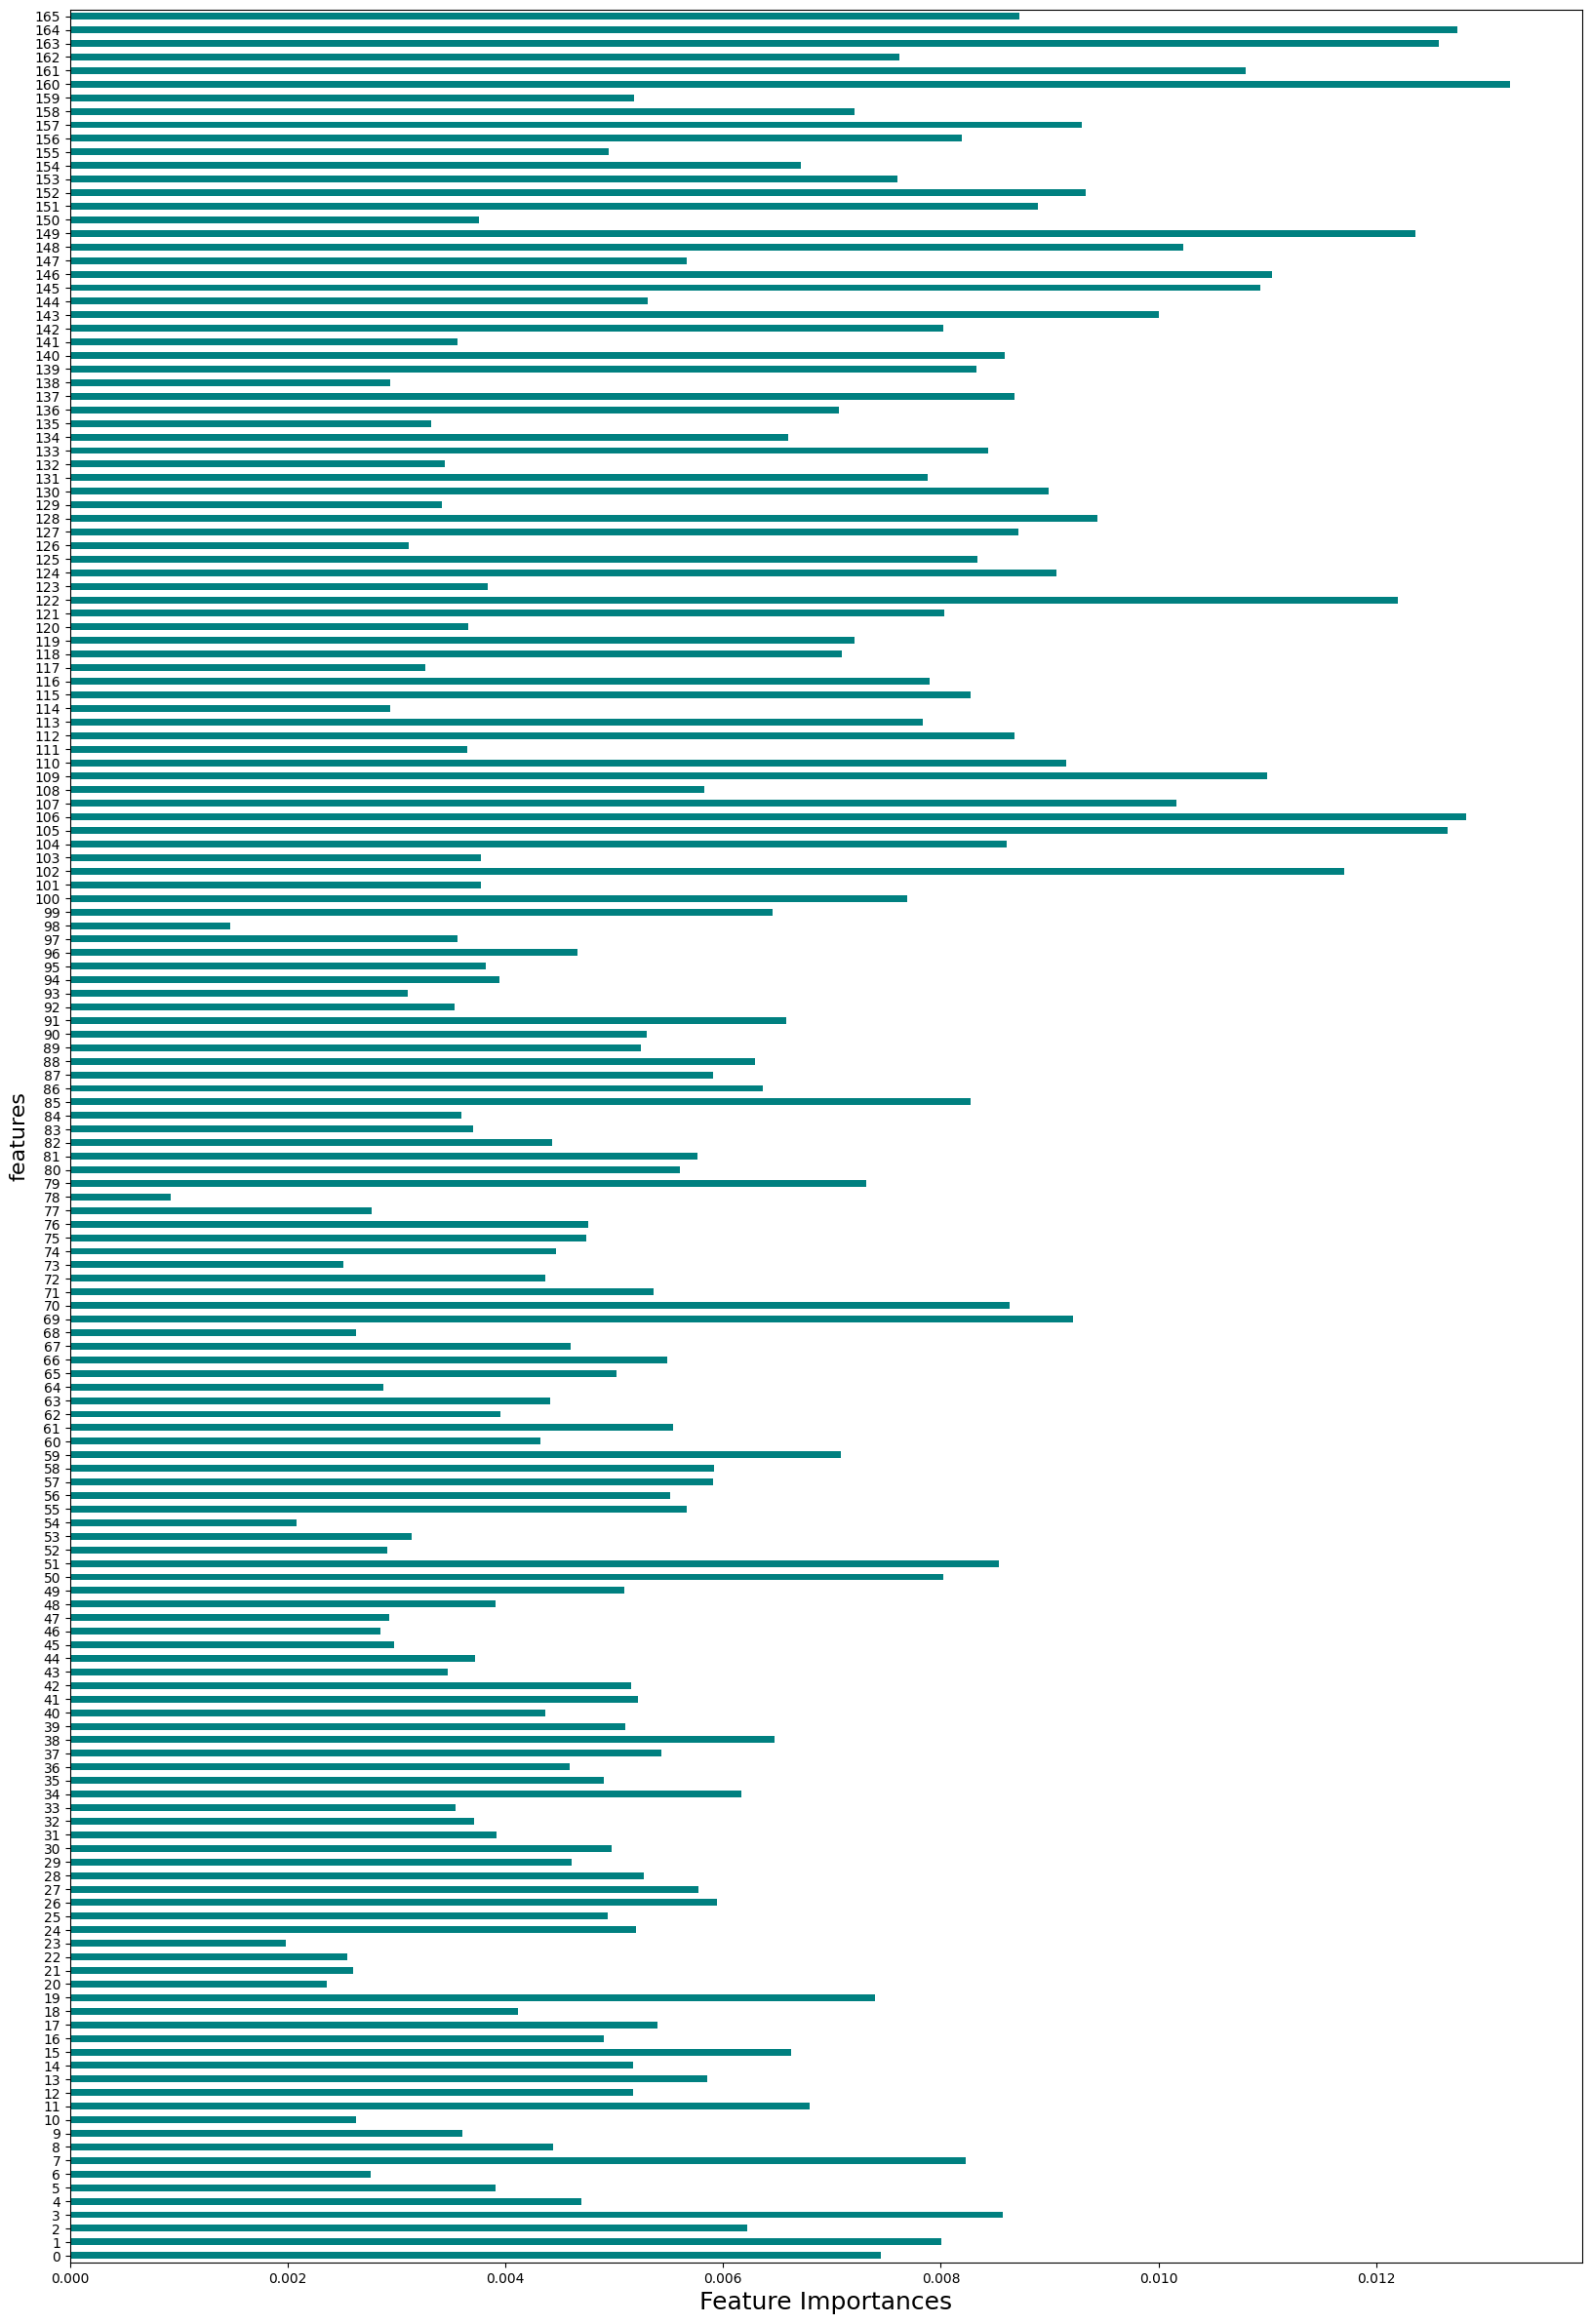

In [5]:
data,target=tree_based_classifier_feature_extraction(data,target)
data.head()

In [6]:
len1=data.shape[1]
l1=list(range(0,len1))
l2=[]
for i in l1:
    i=str(i)
    l2.append(i)
l1=l2
    
data.columns=l1
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.414740,0.373833,2.272500,0.375580,2.316167,0.380257,2.270467,0.446287,0.397397,2.259500,...,0.446047,2.216000,0.346157,2.261033,1.597459,-0.140846,0.162107,-0.027582,0.113375,0.031990
1,0.383848,0.378393,2.279833,0.379317,2.317200,0.383360,2.277767,0.449207,0.401893,2.266967,...,0.449470,2.224300,0.350710,2.268333,1.614270,-0.147442,0.157114,-0.009114,0.088090,0.029938
2,0.385382,0.379813,2.282167,0.380610,2.317700,0.384443,2.280433,0.451327,0.403303,2.269333,...,0.450647,2.227500,0.352113,2.270667,1.619788,-0.148863,0.156264,-0.002401,0.079567,0.029953
3,0.392561,0.379817,2.282300,0.380717,2.317867,0.384600,2.280833,0.452303,0.403313,2.269467,...,0.450833,2.228000,0.352107,2.270800,1.619716,-0.148812,0.155941,-0.001148,0.078291,0.030147
4,0.388555,0.379800,2.282333,0.380730,2.317967,0.384773,2.280933,0.451847,0.403287,2.269467,...,0.451043,2.228167,0.352097,2.270833,1.619620,-0.149545,0.155132,-0.000888,0.077394,0.030157


In [7]:
data['26']=target
data.head()
data.shape
# data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\tree_classifier_extracted.csv",index=False)


(12260, 27)

In [8]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :26], sequences[end_ix-1, 26:]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [9]:
# raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed_modified", "*", "*.csv"))
# # print(raw_angle_files_1)
# all_filenames = [i for i in raw_angle_files_1]
# df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
# data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\tree_classifier_extracted.csv")
# print(df.shape)
# df = df.sample(frac = 1)
# # df.iloc[1:10,:]
data=pd.get_dummies(data,columns=['26'])
data=data.to_numpy()
x,y=split_sequences(data,6)
# x=x[None:]
# print(x.shape)
# print(y.shape)
# data=data.to_numpy()
print(data.shape)

# y=data.iloc[:,26:]
# x=data.iloc[:,:26]
# # x=data[-1:26]
# print(x.shape)
# print(y.shape)
# x=x.to_numpy()
# y=y.to_numpy()
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)
print(x_train.shape)
print(y_train.shape)
print(type(y_train))



model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(6,26)))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu'))
model.add(layers.BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.summary()


# model.summary()
# # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
print(y_train)
print(y_train.shape)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# # print(x.shape)
history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
results = model.evaluate(x_test, y_test)
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
# print(y_pred)
cf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(classification_report(y_test,y_pred))

(12260, 36)
(9804, 6, 26)
(9804, 10)
<class 'numpy.ndarray'>
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             5056      
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             12352     
                                                                 
 dropout (Dropout)           (None, 2, 64)             0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 100)               6500  

In [20]:
cf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(classification_report(y_test,y_pred))

Confusion matrix
 [[205  10   9   0  17   0   2   0   3   1]
 [  0 211   0   0   5   0   7   0   1   0]
 [  0   7 251   1   8   1   2   0   3   6]
 [  0  34  30 186   1   0   0   1   0   0]
 [  0   0   0   1 209   0   1   1  15   0]
 [  2   0   0   0  28 148  20   1  28   1]
 [  0   0   0   0  29   1 248   0   6   0]
 [  0   1   0   1  15   3  12 194  39   3]
 [  0   0   0   0   2   0   0   0 245   4]
 [  0   0   9   0   6   1  11   3  14 147]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       247
           1       0.80      0.94      0.87       224
           2       0.84      0.90      0.87       279
           3       0.98      0.74      0.84       252
           4       0.65      0.92      0.76       227
           5       0.96      0.65      0.77       228
           6       0.82      0.87      0.84       284
           7       0.97      0.72      0.83       268
           8       0.69      0.98      0.81       251
          

In [21]:

print('specificity:')
tot=0
for i in range (10):
    sum=0
    for j in range(10):
        sum=sum+cf_matrix[i,j]
    spec=cf_matrix[i,i]/sum
    tot+=spec
    print(i," ",spec)
print('specificity avg\n',tot/10)




specificity:
0   0.8299595141700404
1   0.9419642857142857
2   0.899641577060932
3   0.7380952380952381
4   0.920704845814978
5   0.6491228070175439
6   0.8732394366197183
7   0.7238805970149254
8   0.9760956175298805
9   0.7696335078534031
specificity avg
 0.8322337426890944


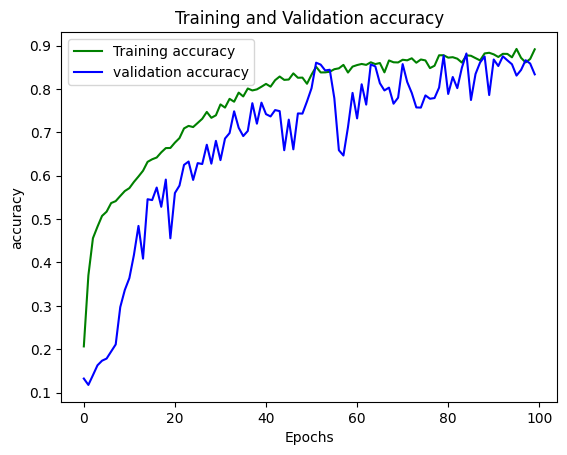

In [22]:
acc_train = history.history["accuracy"]
acc_val = history.history["val_accuracy"]
epochs = range(1,99)
plt.plot(acc_train, 'g', label='Training accuracy')
plt.plot(acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

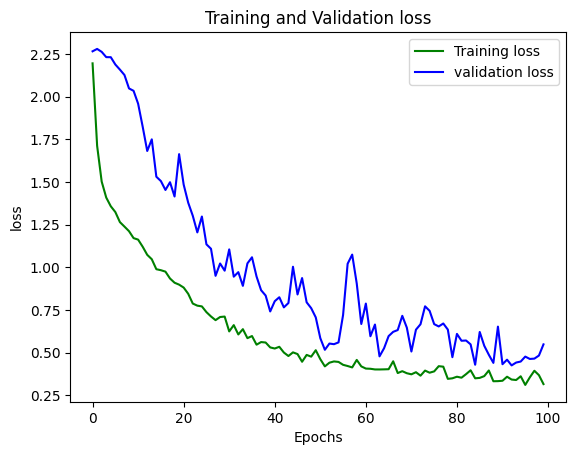

In [23]:
loss_train = history.history["loss"]
loss_val = history.history["val_loss"]
epochs = range(1,99)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()